# **TASK 1** - Exploratory Data Analysis

## Handling missing values if any

In [1]:
import pandas as pd

data = pd.read_csv("/Users/rishikadhingra/Desktop/WTA/wta (1).csv")

missing_values = data.isnull().sum()

print(missing_values)


Tournament    0
Date          0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


/var/folders/yk/zq23l1c9629cntldrc2gp70c0000gn/T/ipykernel_2873/2961699877.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/rishikadhingra/Desktop/WTA/wta (1).csv")


The Dataset contains no missing values

## Extracting rows consisting information of final rounds of Wimbledon Tournament.

In [2]:
final=data['Round']=='The Final'
final

0        False
1        False
2        False
3        False
4        False
         ...  
37632    False
37633    False
37634    False
37635    False
37636     True
Name: Round, Length: 37637, dtype: bool

In [3]:
data[final]

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
28,ASB Classic,2007-01-06 00:00:00,Outdoor,Hard,The Final,3,Jankovic J.,Zvonareva V.,Jankovic J.,12,24,1211,781,1.53,2.37,7-6 5-7 6-3
58,Mondial Australian Women's Hardcourts,2007-01-06 00:00:00,Outdoor,Hard,The Final,3,Safina D.,Hingis M.,Safina D.,11,7,1390,2018,3.0,1.36,6-3 3-6 7-5
89,Moorilla Hobart International,2007-01-12 00:00:00,Outdoor,Hard,The Final,3,Bardina V.,Chakvetadze A.,Chakvetadze A.,70,13,365,1144,3.5,1.25,3-6 6-7
114,Medibank International,2007-01-12 00:00:00,Outdoor,Hard,The Final,3,Clijsters K.,Jankovic J.,Clijsters K.,5,12,2215,1296,1.39,2.75,4-6 7-6 6-4
240,Australian Open,2007-01-27 00:00:00,Outdoor,Hard,The Final,3,Williams S.,Sharapova M.,Williams S.,81,2,331,3532,2.87,1.39,6-1 6-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37396,Internationaux de Strasbourg,2023-05-27 00:00:00,Outdoor,Clay,The Final,3,Svitolina E.,Blinkova A.,Svitolina E.,508,87,66,821,1.73,2.10,6-2 6-3
37518,French Open,2023-06-10 00:00:00,Outdoor,Clay,The Final,3,Swiatek I.,Muchova K.,Swiatek I.,1,43,8940,1125,1.14,6.50,6-2 5-7 6-4
37547,Rosmalen Grass Court Championships,2023-06-18 00:00:00,Outdoor,Grass,The Final,3,Kudermetova V.,Alexandrova E.,Alexandrova E.,14,26,2520,1535,1.73,2.10,6-4 4-6 6-7
37578,Nottingham Open,2023-06-18 00:00:00,Outdoor,Grass,The Final,3,Boulter K.,Burrage J.,Boulter K.,126,131,567,531,1.44,2.75,6-3 6-3


Hence, the rows consisting information of final rounds of Wimbledon Tournament are extracted.

## Countplot depicting Winners vs No of Grand Slam Tournament wins

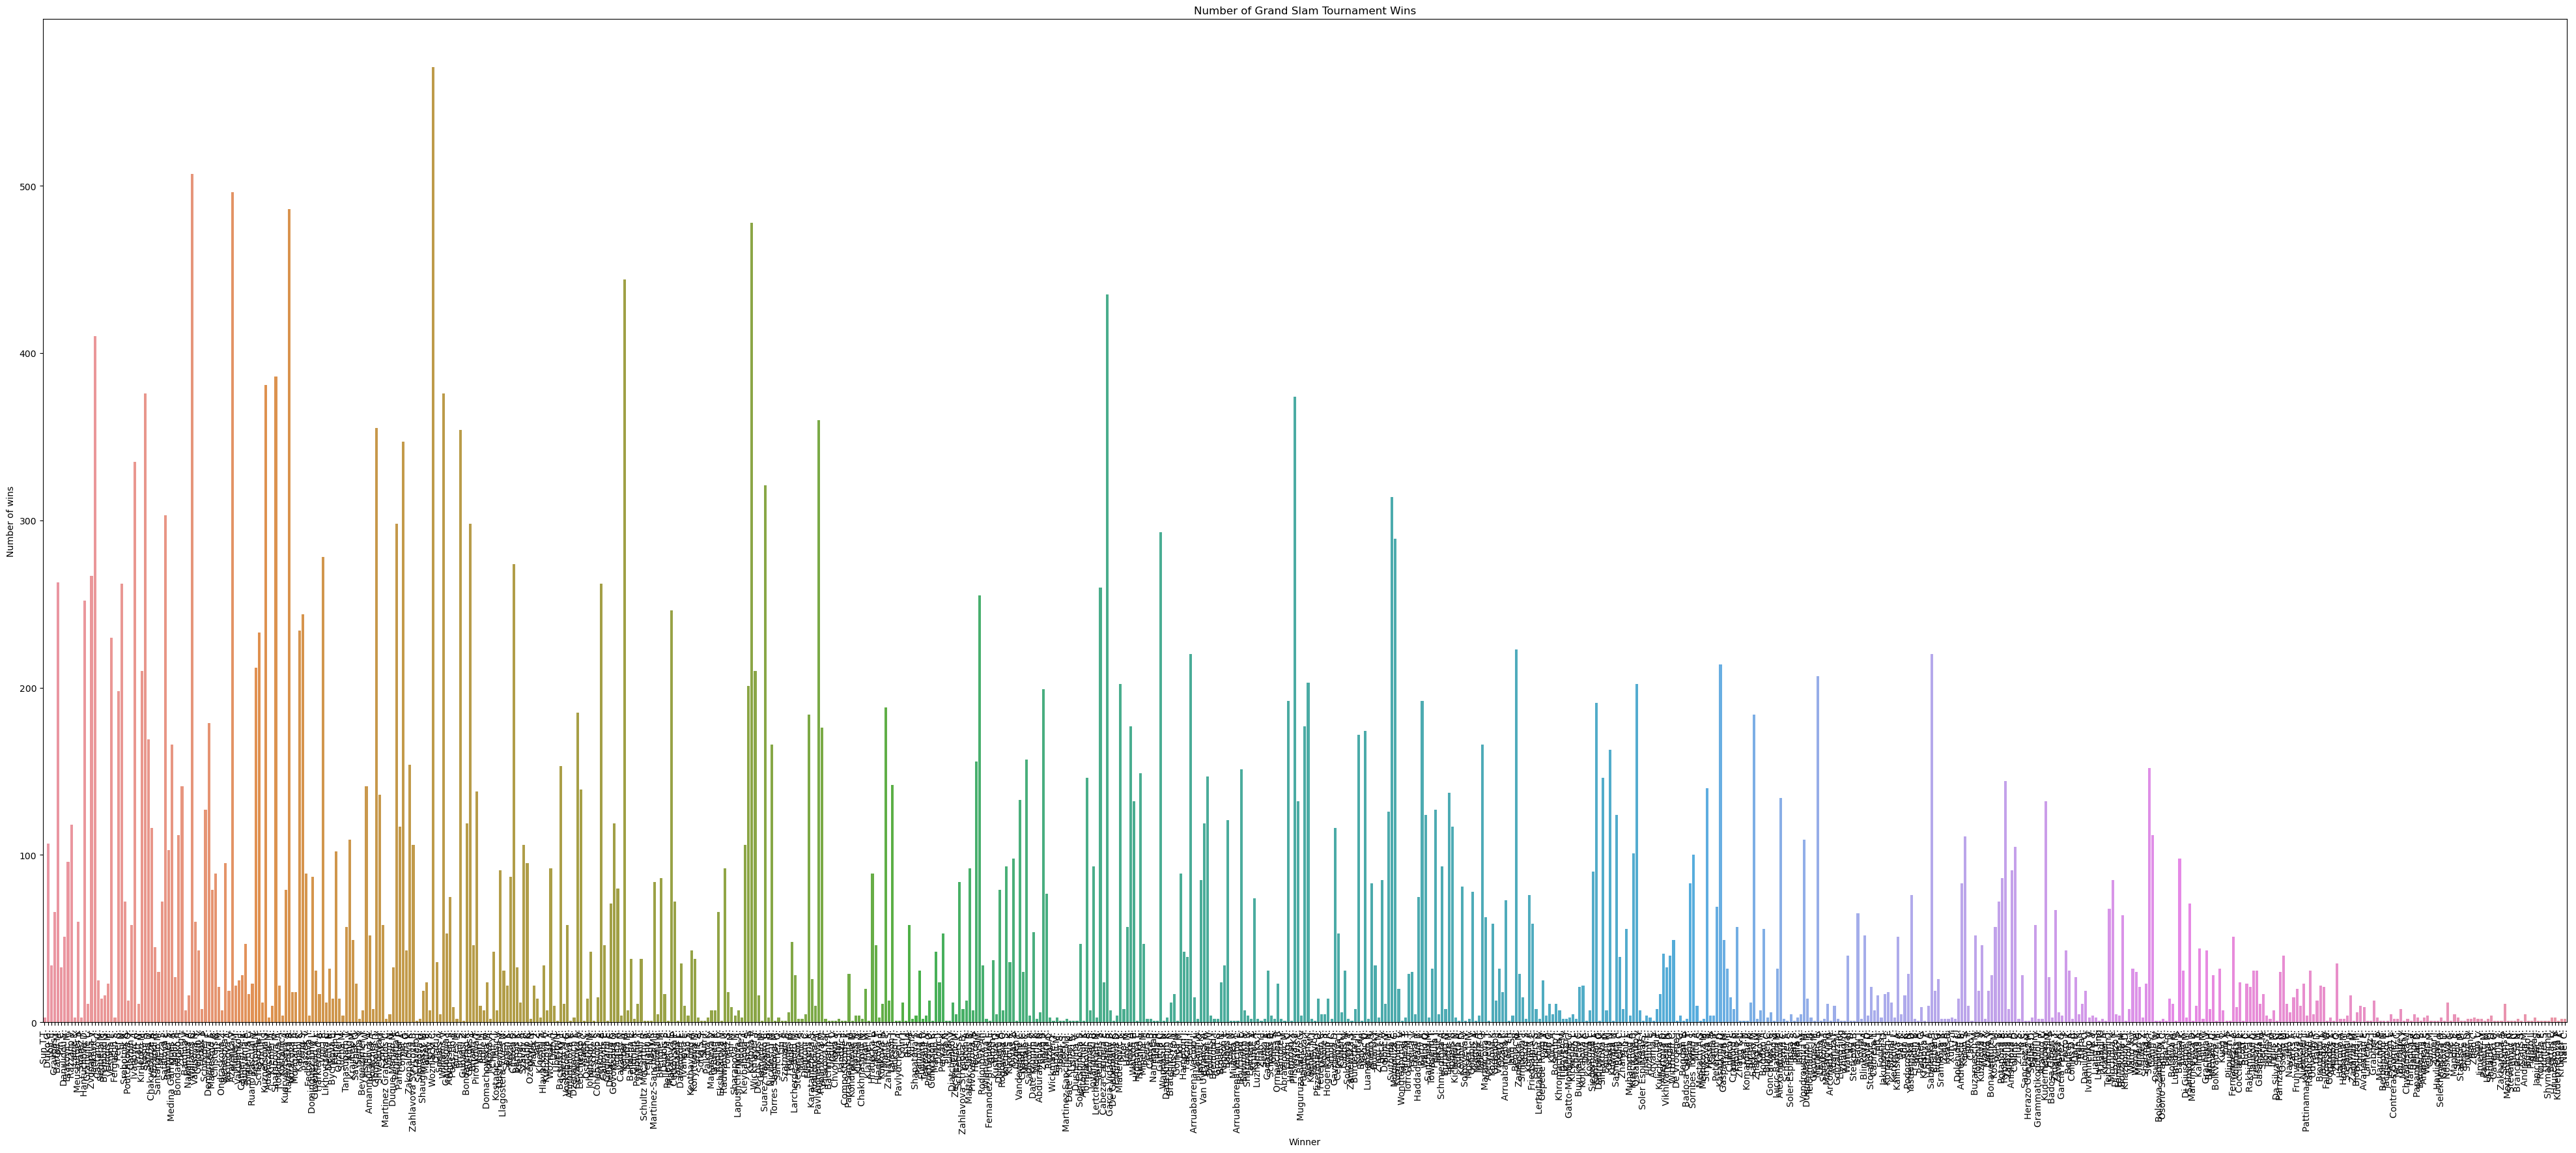

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 20))
sns.countplot(x='Winner', data=data)
plt.title('Number of Grand Slam Tournament Wins')
plt.xlabel('Winner')
plt.ylabel('Number of wins')
plt.xticks(rotation=90)
plt.show()

This is the countplot depicting Winners vs No of Grand Slam Tournament wins

## Handling duplicate values if any

In [5]:
duplicates=data[data.duplicated()]


In [6]:
duplicates.nunique()

Tournament    0
Date          0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64

There are no duplicate values

## Stacked bar chart depicting distribution of Tournament wins(in different colours) of top 5 WTA players.

<Figure size 1200x800 with 0 Axes>

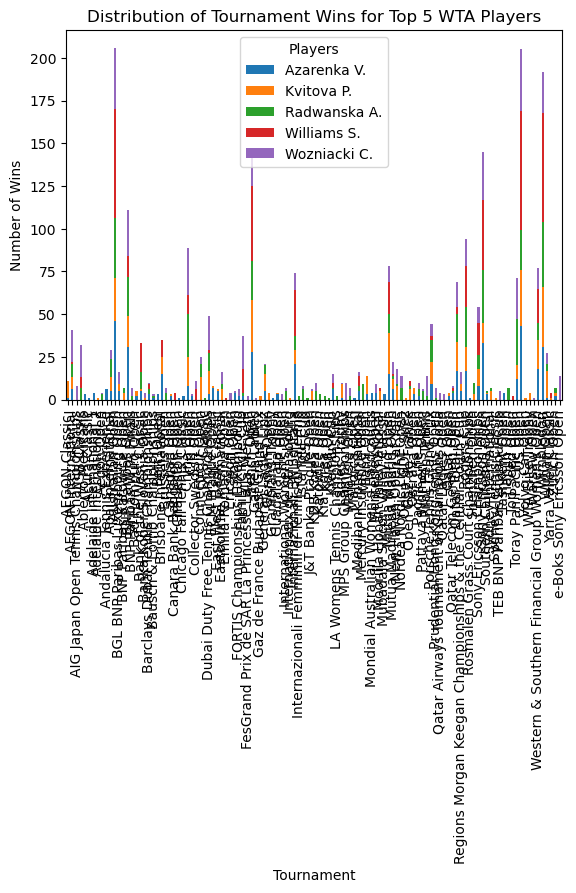

In [7]:
top_players = data.groupby('Winner').size().sort_values(ascending=False).head(5)
top_players_names = top_players.index.tolist()
top_players_data = data[data['Winner'].isin(top_players_names)]

pivot_table = top_players_data.pivot_table(index='Tournament', columns='Winner', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Tournament')
plt.ylabel('Number of Wins')
plt.title('Distribution of Tournament Wins for Top 5 WTA Players')
plt.legend(title='Players')
plt.show()

This is the stacked bar chart depicting distribution of Tournament wins(in different colours) of top 5 WTA players.

# **TASK 2** - Classification/Regression

Performing following steps on the same dataset used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Finally summarizing model's performance by evaluation metrices



In [8]:
data['Odd_1'] = data['Odd_1'].replace('5..5',float(5.5))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#Convert 'Odd_1' to numeric, forcing errors to NaN
data['Odd_1'] = pd.to_numeric(data['Odd_1'], errors='coerce')

# Drop rows with NaN values in 'Odd_1'
data = data.dropna(subset=['Odd_1'])

# Example: Binarize the target variable
threshold_value = 2.5  # Choose an appropriate threshold
data['Odd_1_binary'] = (data['Odd_1'] > threshold_value).astype(int)

# Prepare features and target variable
X = data[['Odd_2']]  # Ensure X is a 2D array
Y = data['Odd_1_binary']  # Target variable for classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# Make predictions
predictions = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Logistic Regression Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.9889744952178533


In [10]:
from sklearn.linear_model import LinearRegression

# Use Linear Regression for continuous target
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), Y.values, test_size=0.2, random_state=42)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

predictions = linear_regression.predict(X_test)
r2_score = linear_regression.score(X_test, y_test)
print(f"Linear Regression R^2 Score: {r2_score}")


Linear Regression R^2 Score: 0.17053833967899557
